# Heart Disease Classification base models


#### I will run base models for the following algorithms for comparison
#### I will select only six of the models and I will tune four of the six
#### I thought it would be interesting to see how all models perform

     *Naive Bayes
     *KNN
     *Logistic Regression
     *Support Vector Machine
     *Random Forest
     *Gradient Boosting
     *Decision Trees
     *XGBoost

In [42]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from IPython.display import Image

import pydotplus
import graphviz
import seaborn as sns
import scipy.stats as stats

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [43]:
X=pd.read_csv('X_train.csv',  index_col=0)
y=pd.read_csv('y_train.csv', header=-1, index_col=0)

X=X.reset_index()
y=y.reset_index()

X.drop(X.columns[[0]],axis=1, inplace=True)
y.drop(y.columns[[0]],axis=1, inplace=True)

In [44]:
vif_X = add_constant(X.iloc[:, :])
pd.Series([variance_inflation_factor(vif_X.values, i) 
               for i in range(vif_X.shape[1])], 
              index=vif_X.columns)

const                  207.256646
age                      1.443474
sex                      1.161866
chest_pain               1.284456
resting_bp               1.170591
cholesterol              1.150174
fasting_blood_sugar      1.087379
resting_ecg              1.060998
max_heart_rate           1.613726
exercise_angina          1.402001
oldpeak                  1.705857
slope                    1.642595
num_major_vessels        1.202570
thalium_stress_test      1.147279
dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 99)

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)
X_train.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [56]:
print('\t score\t  stdev\t\tmean cross-validation')
results = []
names = []
models = []
cross_val = []

models.append(('NB', BernoulliNB()))
models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', LinearSVC()))
models.append(('RFC', ensemble.RandomForestClassifier()))
models.append(('GMB', ensemble.GradientBoostingClassifier()))
models.append(('DTC', tree.DecisionTreeClassifier(criterion='entropy')))
models.append(('XGB', xgb.XGBClassifier()))


for name, model in models:
    kfold = model_selection.KFold(n_splits = 3, random_state = 99)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,
                                                cv = kfold, 
                                                 scoring = 'accuracy')
    score = cross_val_score(model, X, y, cv=10)
    results.append(cv_results)
    names.append(name)
    cross_val.append(score.mean())
    
    msg = "%s:\t%f (%f) \t%f" % (name, cv_results.mean(), cv_results.std(), score.mean())
    print(msg)


	 score	  stdev		mean cross-validation
NB:	0.781224 (0.049980) 	0.820971
KNN:	0.656790 (0.047409) 	0.653730
LR:	0.814300 (0.043216) 	0.823745
SVM:	0.701903 (0.098702) 	0.767586
RFC:	0.772891 (0.041218) 	0.784383
GMB:	0.789352 (0.019223) 	0.810319
DTC:	0.752263 (0.060660) 	0.758383
XGB:	0.801852 (0.039567) 	0.803967


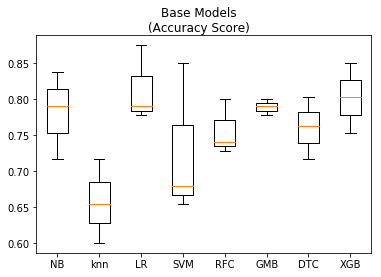

In [48]:
#the accuracy scores
fig = plt.figure()
fig.suptitle('Base Models\n(Accuracy Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

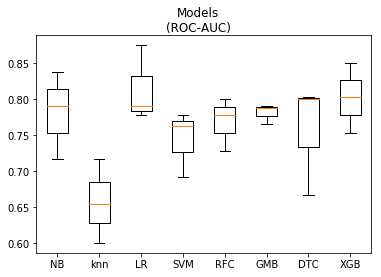

In [52]:
fig = plt.figure()
fig.suptitle('Models\n(ROC-AUC)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()